# Autolib Data Cleaning, E.D.A: Univariate and Bivariate Analysis, Hypothesis Testing

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> We need to identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that we will have made.

### b) Defining the Metric for Success

> The metric for success is to find which day blue car is used most.

### c) Understanding the context 

We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.

In an effort to do this, we need to identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that we will have made. An example of claim to test would be "Is the number of Bluecars taken in area X different than in area Y? Is it greater in area X than in area Z? Etc”. The selected periods of interest be either weekdays or weekends but not a mix of both. You can also consider postal codes 75015 vs 75017 to some of the areas of interest. 



### d) Recording the Experimental Design

> Find and deal with outliers, anomalies, and missing data within the dataset.

> Plot appropriate univariate and bivariate summaries recording our observations.

> Implement the solution by performing hypothesis testing.

> This will need to be documented when writing the report. 

### e) Data Relevance

> The dataset was gotten from Autolib and has been approved and to be genuine

## 2. Reading the Data

In [98]:
#importing the libraries
# let's import the libraries we need

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
import time
import datetime
import os
import sys

In [99]:
# let's import the data

df = pd.read_csv('autolib_daily_events_postal_code.csv')

## 3. Checking the Data

In [100]:
# let's preview the dataset

df.head(10)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
5,75001,1/6/2018,1437,5,weekend,187,185,6,6,7,8,38,35
6,75001,1/7/2018,1440,6,weekend,180,180,2,2,10,9,34,34
7,75001,1/8/2018,1438,0,weekday,84,83,3,3,10,10,14,15
8,75001,1/9/2018,1439,1,weekday,81,84,1,1,4,4,15,15
9,75001,1/10/2018,1440,2,weekday,88,85,5,5,11,11,23,22


In [101]:
# let's check the data types

df.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [102]:
# let's check the number of rows and columns

df.shape

(16085, 13)

In [103]:
# let's see the columns

df.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [104]:
# let's see the info about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [105]:
# let's check for numerical columns

df.select_dtypes(include=['int64', 'float64']).columns

Index(['Postal code', 'n_daily_data_points', 'dayOfWeek', 'BlueCars_taken_sum',
       'BlueCars_returned_sum', 'Utilib_taken_sum', 'Utilib_returned_sum',
       'Utilib_14_taken_sum', 'Utilib_14_returned_sum', 'Slots_freed_sum',
       'Slots_taken_sum'],
      dtype='object')

## 4. External Data Source Validation

## 5. Tidying the Dataset

In [106]:
# let's check for missing values

df.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [107]:
# let's check for anomalies

df.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [108]:
# checking for outliers using the quantile percentile

df.quantile([0.05, 0.95])

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0.05,75006.0,1380.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
0.95,94500.0,1440.0,6.0,525.8,531.8,17.0,17.0,37.0,37.0,149.0,149.0


In [109]:
# let's check for null values and the percentages in each column

total = df.isnull().sum().sort_values(ascending=False)
percentage = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
df1 = pd.concat([total, percentage], axis=1, keys=['Total', 'Percentage'])
df1.head(20)

,Total,Percentage
Postal code,0,0.0
date,0,0.0
n_daily_data_points,0,0.0
dayOfWeek,0,0.0
day_type,0,0.0
BlueCars_taken_sum,0,0.0
BlueCars_returned_sum,0,0.0
Utilib_taken_sum,0,0.0
Utilib_returned_sum,0,0.0
Utilib_14_taken_sum,0,0.0


> We dont have null values in the dataset

In [110]:
# let's check for data types

df.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

> We will not drop the outliers in the postal code column because if we do that we might end up loosing postal addresses to some regions which will make our output biased.

In [111]:
df['dayOfWeek'] = df.dayOfWeek.map({0:"Monday", 1:"Tuesday",2:"Wednesday",3:"Thursday", 4:"Friday",5:"Saturday",6:"Sunday"})
df['dayOfWeek'].head()

0       Monday
1      Tuesday
2    Wednesday
3     Thursday
4       Friday
Name: dayOfWeek, dtype: object

/var/folders/rh/hyhcn5f12jqd6_4fz9f24wg80000gn/T/ipykernel_23033/1473048499.py:22: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  col_names = df.drop(['Postal code','date','day_type','dayOfWeek'],1)


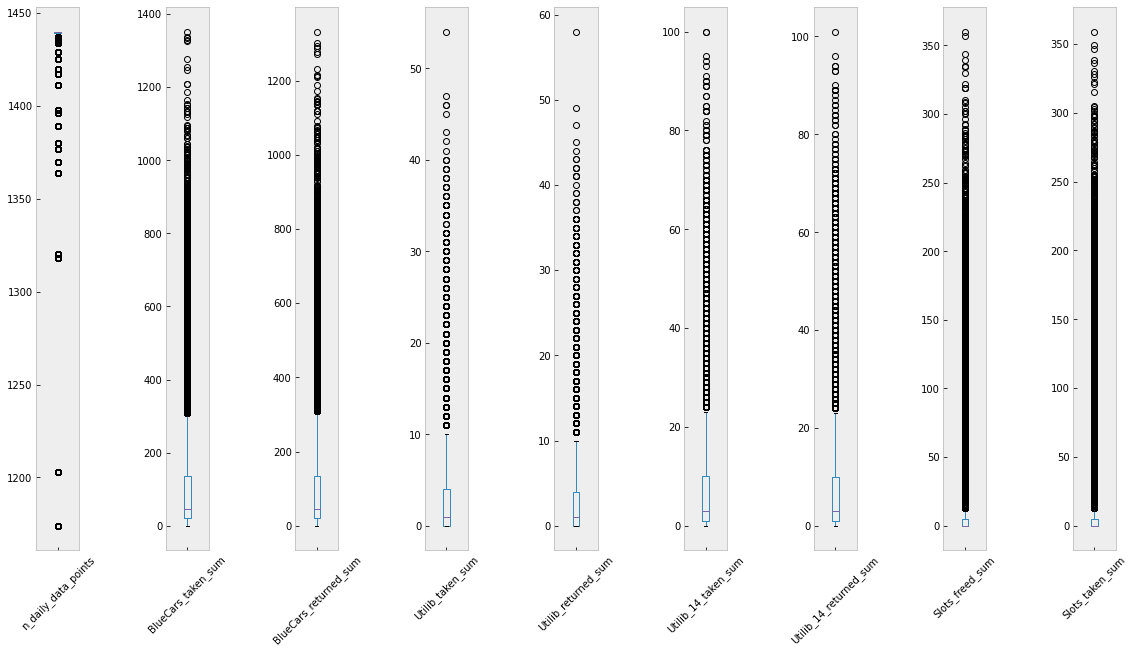

In [112]:
# Checking for Outliers


def outlier_visualiser(dataset_name, numeric_columns_list, width=15, height=10):
    
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = width
    fig_size[1] = height
    plt.rcParams["figure.figsize"] = fig_size
    plt.style.use('bmh')
    
    next_figure = 1
    for col in numeric_columns_list:
        plt.subplot(1, len(numeric_columns_list), next_figure)
        dataset_name.boxplot(col, rot = 45,grid=False)
        next_figure = next_figure + 1

    plt.subplots_adjust(left = 1, right= 2,hspace= 2, wspace=2)
    plt.show()
    
#we define our numeric columns list in our dataset then call the funtion for visual display
col_names = df.drop(['Postal code','date','day_type','dayOfWeek'],1)
outlier_visualiser(df, col_names.columns)

In [113]:
# Removing Outliers
q3 = df.quantile(0.75)
q1 = df.quantile(0.25)

iqr = q3-q1

fin_outliers = df[~((df < (q1 - 1.5 * iqr)) |(df > (q3 + 1.5 * iqr))).any(axis=1)]
print(fin_outliers.shape)

(9783, 13)


/var/folders/rh/hyhcn5f12jqd6_4fz9f24wg80000gn/T/ipykernel_23033/2842703875.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  fin_outliers = df[~((df < (q1 - 1.5 * iqr)) |(df > (q3 + 1.5 * iqr))).any(axis=1)]


## 6. Exploratory Analysis

## Univariate Analysis

In [114]:
# let's check for the number of missing values in each column
df.isnull().sum().any()

False

In [115]:
# categorical variables
pd.crosstab(df['Postal code'], df['day_type'])

day_type,weekday,weekend
Postal code,,
75001,112,44
75002,112,44
75003,112,44
75004,112,44
75005,112,44
...,...,...
94700,112,44
94800,112,44
95100,112,44


In [116]:
# numerical variables
pd.crosstab(df['Postal code'], df['dayOfWeek'])

dayOfWeek,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Postal code,,,,,,,
75001,22,23,22,22,22,23,22
75002,22,23,22,22,22,23,22
75003,22,23,22,22,22,23,22
75004,22,23,22,22,22,23,22
75005,22,23,22,22,22,23,22
...,...,...,...,...,...,...,...
94700,22,23,22,22,22,23,22
94800,22,23,22,22,22,23,22
95100,22,23,22,22,22,23,22


In [117]:
# categorical variables
pd.crosstab(df['Postal code'], df['BlueCars_taken_sum'])

BlueCars_taken_sum,0,1,2,3,4,5,6,7,8,9,...,1186,1209,1248,1255,1277,1327,1330,1335,1338,1352
Postal code,,,,,,,,,,,,,,,,,,,,,
75001,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
75002,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
75003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
75004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
75005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94700,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
94800,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
95100,0,0,1,0,1,0,2,0,1,3,...,0,0,0,0,0,0,0,0,0,0


In [118]:
# category variables
pd.crosstab(df['Postal code'], df['Utilib_taken_sum'])

Utilib_taken_sum,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,45,46,47,54
Postal code,,,,,,,,,,,,,,,,,,,,,
75001,11,18,30,24,26,15,11,8,5,5,...,0,0,0,0,0,0,0,0,0,0
75002,6,10,19,27,23,12,22,6,9,12,...,0,0,0,0,0,0,0,0,0,0
75003,2,6,7,15,16,21,17,19,11,10,...,0,0,0,0,0,0,0,0,0,0
75004,4,12,15,19,24,18,11,16,14,7,...,0,0,0,0,0,0,0,0,0,0
75005,1,1,2,8,18,11,19,15,15,13,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94700,68,53,15,11,4,2,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
94800,22,33,41,25,9,16,3,4,2,0,...,0,0,0,0,0,0,0,0,0,0
95100,89,47,14,4,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [119]:
# categorical data
pd.crosstab(index=df['day_type'], columns='count')

col_0,count
day_type,
weekday,11544
weekend,4541


In [120]:
# categorical data
pd.crosstab(index=df['BlueCars_taken_sum'], columns='count')

col_0,count
BlueCars_taken_sum,
0,65
1,138
2,149
3,178
4,172
...,...
1327,1
1330,1
1335,1


[[<AxesSubplot:title={'center':'Postal code'}>
  <AxesSubplot:title={'center':'n_daily_data_points'}>
  <AxesSubplot:title={'center':'BlueCars_taken_sum'}>]
 [<AxesSubplot:title={'center':'BlueCars_returned_sum'}>
  <AxesSubplot:title={'center':'Utilib_taken_sum'}>
  <AxesSubplot:title={'center':'Utilib_returned_sum'}>]
 [<AxesSubplot:title={'center':'Utilib_14_taken_sum'}>
  <AxesSubplot:title={'center':'Utilib_14_returned_sum'}>
  <AxesSubplot:title={'center':'Slots_freed_sum'}>]
 [<AxesSubplot:title={'center':'Slots_taken_sum'}> <AxesSubplot:>
  <AxesSubplot:>]]


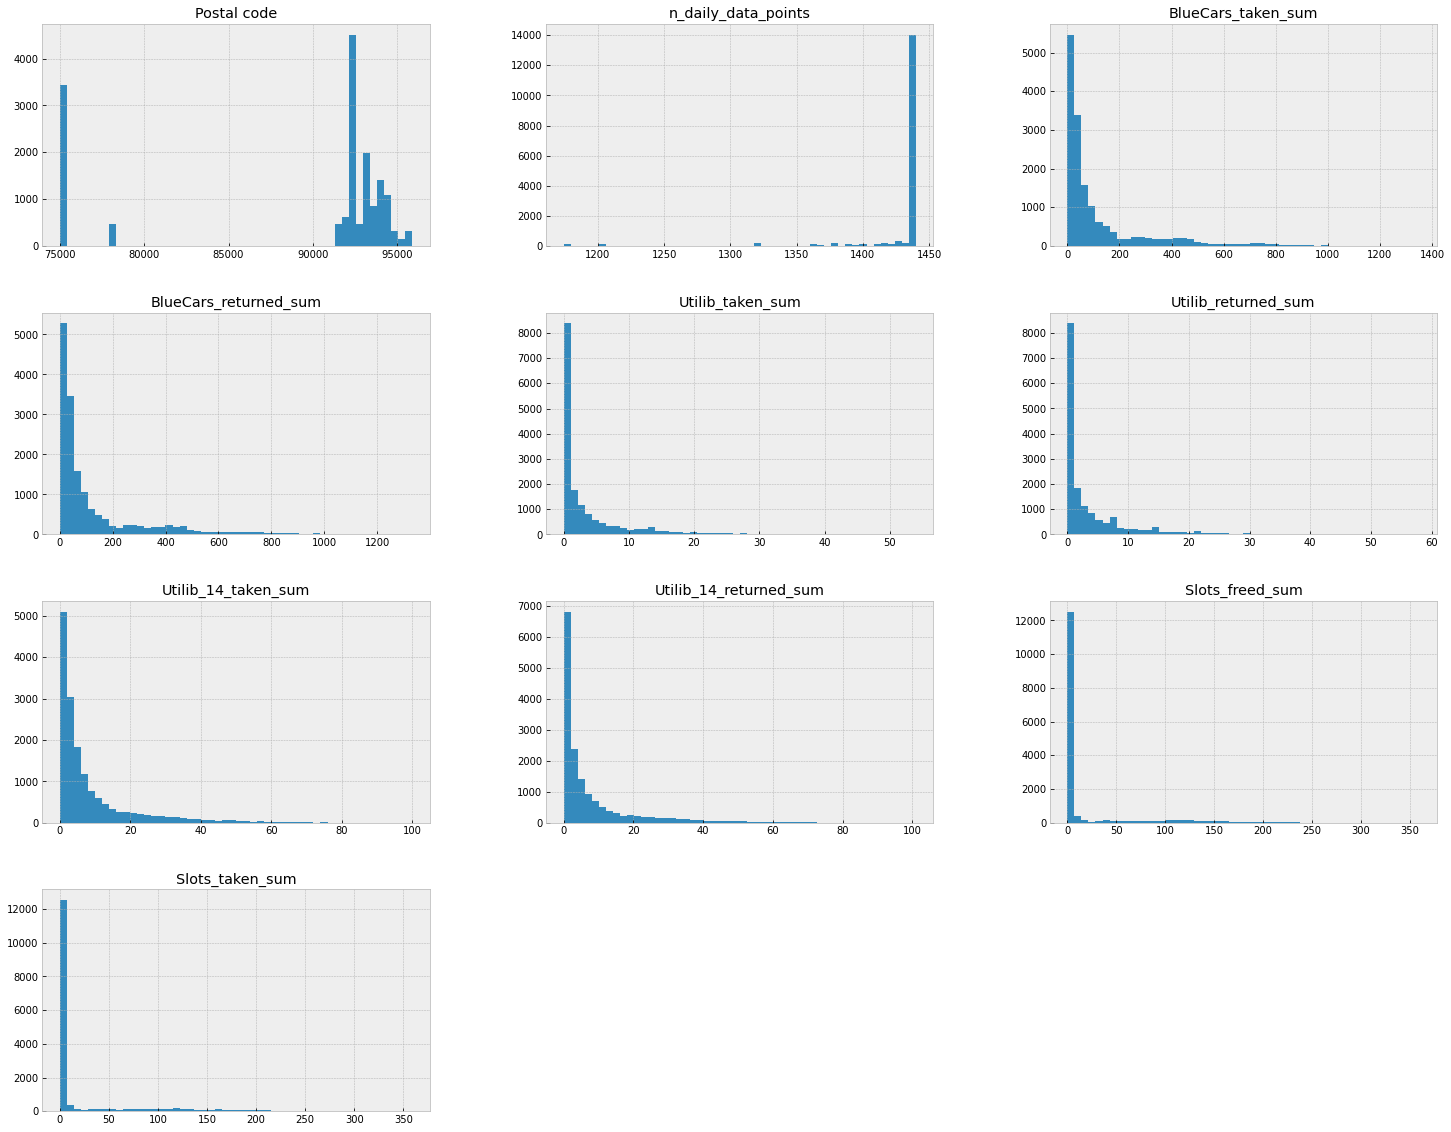

In [121]:
# let's plot.

print(df.hist(bins=50, figsize=(25,20)))

## BIVARIATE ANALYSIS

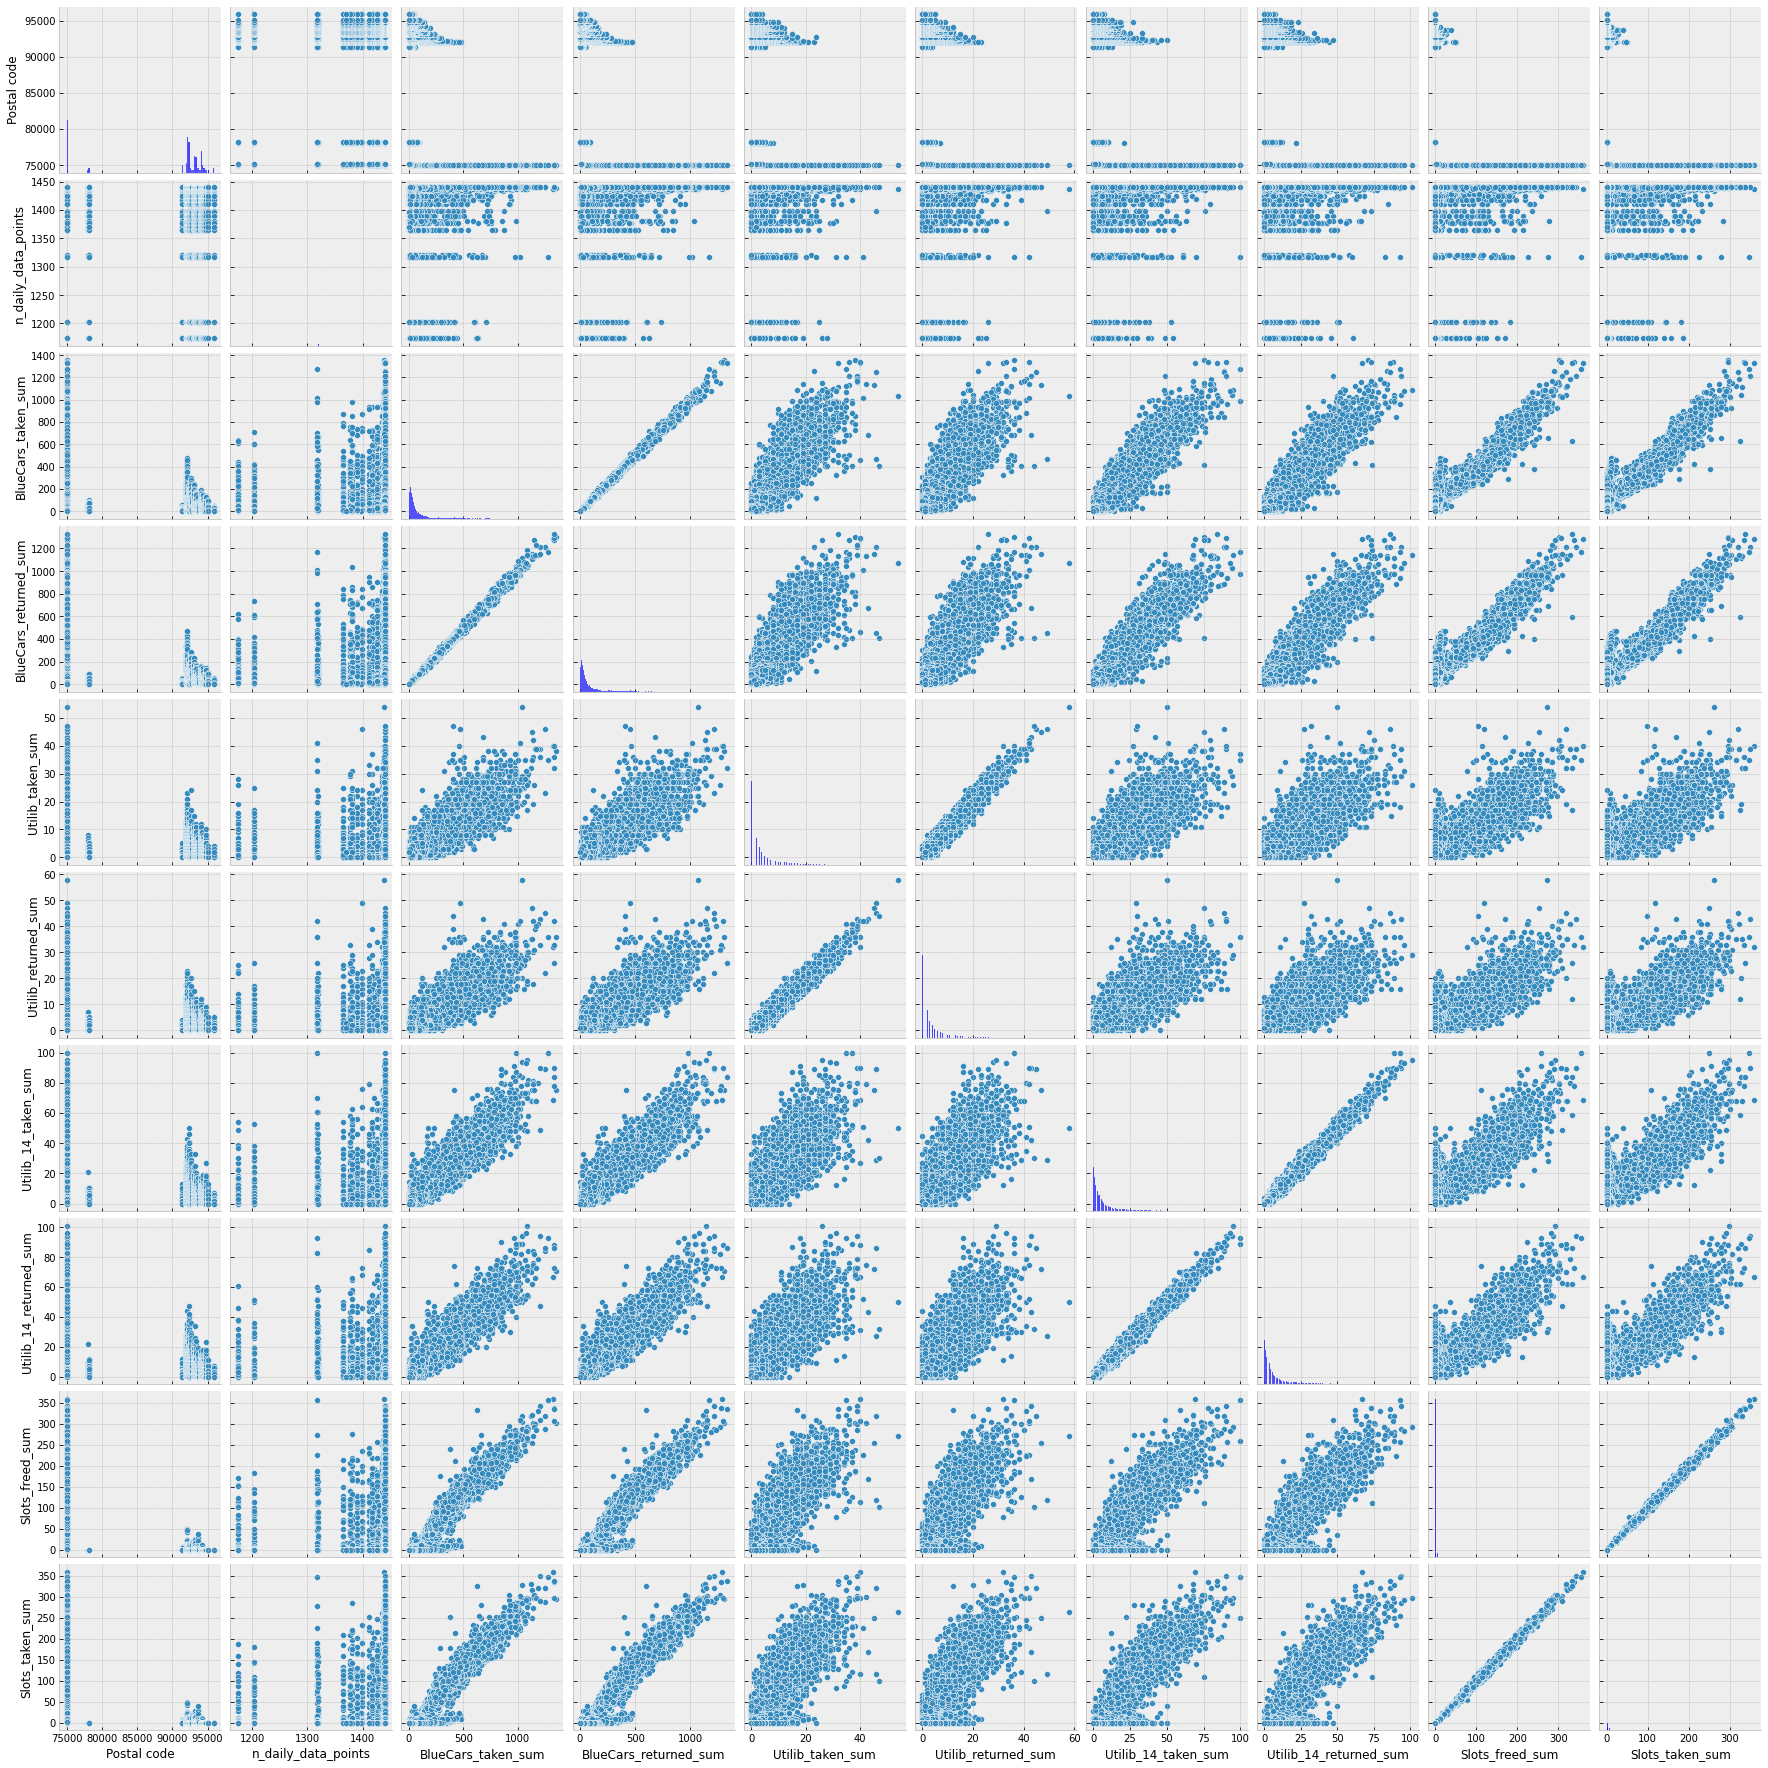

In [137]:
# let's plot the bivariate summaries and recording our observations

sns.pairplot(df)
plt.show()

<AxesSubplot:>

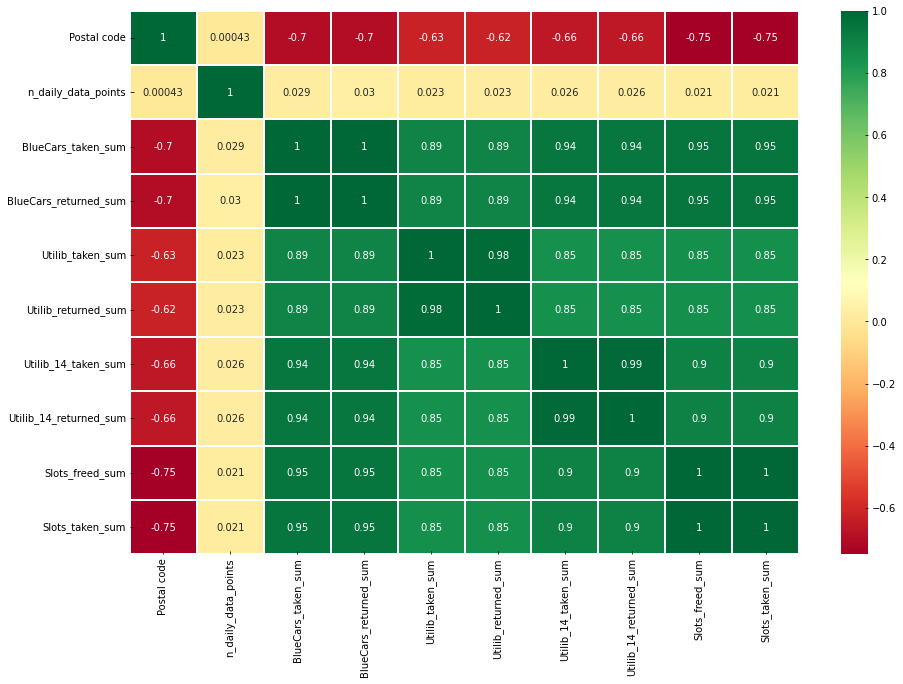

In [122]:
# let's use the pearson correlation coefficient to find the variables with the highest correlation using a heatmap

sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(14.425000000000004, 0.5, 'Blue Cars Returned')

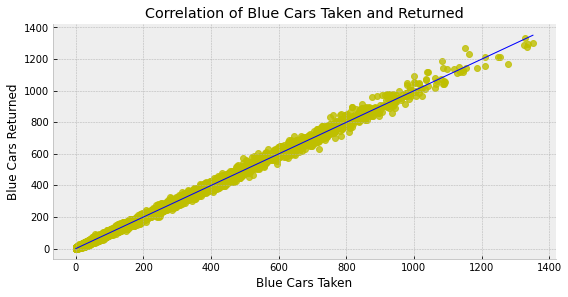

In [123]:
# scatter plot of blue cars taken and blue cars returned

sns.lmplot('BlueCars_taken_sum', "BlueCars_returned_sum", df, scatter_kws={'marker':'o', 'color': 'y'}, 
           line_kws={'linewidth':1,'color':'blue'}, height = 4, aspect = 2)

plt.title("Correlation of Blue Cars Taken and Returned")
plt.xlabel('Blue Cars Taken')
plt.ylabel("Blue Cars Returned")

### Hypothesis Testing

### a) Sampling

Sampling is a process used in statistical analysis in which a predetermined number of observations are taken from a larger population. The methodology used to sample from a larger population depends on the type of analysis being performed but may include simple random sampling or systematic sampling.

Stratified random sampling is a method of sampling that involves the division of a population into smaller groups known as strata. In stratified random sampling or stratification, the strata are formed based on members' shared attributes or characteristics.

In [124]:
# Stratified sampling

autolib_sample_df= df.groupby('dayOfWeek',group_keys=False).apply(lambda x : x.sample(frac = 0.3))

autolib_sample_df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
12210,93440,1/19/2018,1440,Friday,weekday,2,3,0,0,0,1,0,0
2879,75019,3/16/2018,1440,Friday,weekday,562,543,5,4,32,32,120,115
7154,92270,6/1/2018,1440,Friday,weekday,21,24,0,0,3,2,0,0
472,75004,1/5/2018,1440,Friday,weekday,194,203,5,5,16,17,39,39
12203,93440,1/12/2018,1439,Friday,weekday,2,4,0,0,0,0,0,0


In [125]:
# let's get the sample mean and sample standard 

samp_mean_taken = autolib_sample_df.BlueCars_taken_sum.mean()
samp_mean_returned = autolib_sample_df.BlueCars_returned_sum.mean()
samp_std_taken = autolib_sample_df.BlueCars_taken_sum.std()
samp_std_returned = autolib_sample_df.BlueCars_returned_sum.std()
print("The Sample mean of blue cars taken",samp_mean_taken)
print("The Sample mean of blue cars returned",samp_mean_returned)
print("The Sample standard deviation of blue cars taken",samp_std_taken)
print("The Sample standard deviation of blue cars returned",samp_std_returned)

The Sample mean of blue cars taken 126.01160862354892
The Sample mean of blue cars returned 125.89013266998342
The Sample standard deviation of blue cars taken 185.53124901304207
The Sample standard deviation of blue cars returned 185.29871080742873


In [126]:
from scipy.stats import poisson

In [127]:
#The probability that 117 bluecars were taken  on Friday 

Friday = autolib_sample_df[autolib_sample_df.dayOfWeek == "Friday"]

Taken_On_Friday  = Friday.BlueCars_taken_sum.mean()
poisson.pmf(117,Taken_On_Friday)

0.022782589414681878

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


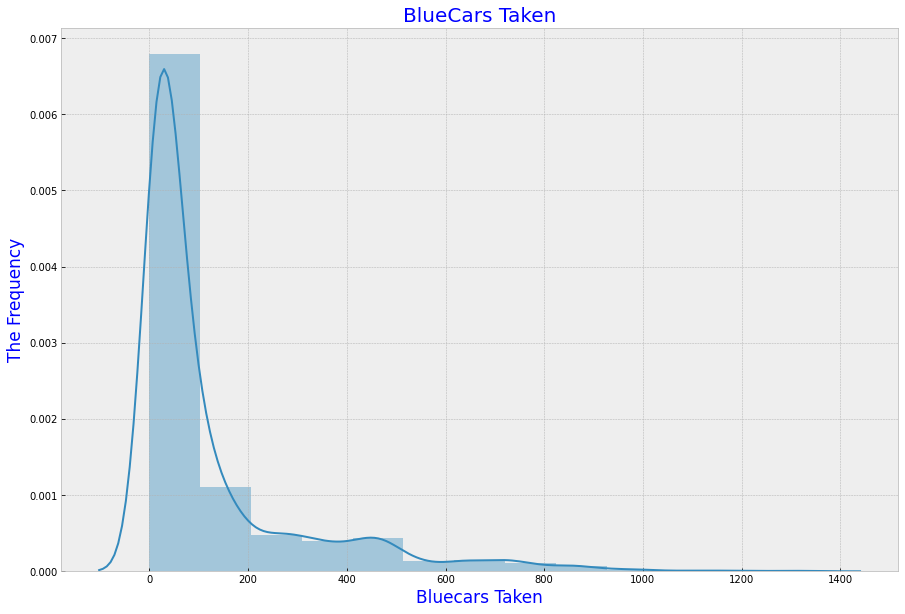

In [128]:
# To plot the test for normality on bluecars taken

sns.distplot(autolib_sample_df.BlueCars_taken_sum, bins=13, hist=True, kde=True)

plt.title("BlueCars Taken", fontsize =20, color = 'blue')

plt.xlabel("Bluecars Taken", fontsize =17, color = 'blue')

plt.ylabel("The Frequency", fontsize =17, color = 'blue')

plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


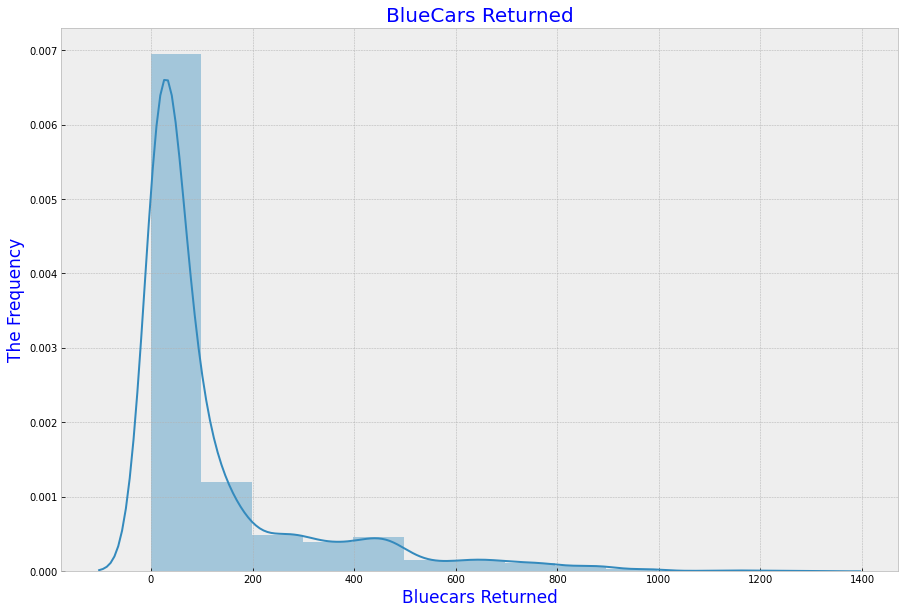

In [129]:
from statsmodels.stats import weightstats

# To plot the test for normality on bluecars taken

sns.distplot(autolib_sample_df.BlueCars_returned_sum, bins=13, hist=True, kde=True)

plt.title("BlueCars Returned", fontsize =20, color = 'blue')

plt.xlabel("Bluecars Returned", fontsize =17, color = 'blue')

plt.ylabel("The Frequency", fontsize =17, color = 'blue')

plt.show()

### Shapiro Test

In [136]:
# let's check for the shapiro-wilk test for normality

from scipy.stats import shapiro

shapiro(df.BlueCars_taken_sum)


ShapiroResult(statistic=0.661232590675354, pvalue=0.0)

### Let's check for the confidence level

In [ ]:
# let's get the confidence interval for the mean of blue cars taken
import math

samp_mean_taken = df.BlueCars_taken_sum.mean()
samp_std_taken = df.BlueCars_taken_sum.std()

confidence_interval_taken = samp_std_taken/math.sqrt(df.shape[0])
print("The confidence interval for the mean of blue cars taken is",confidence_interval_taken)

The confidence interval for the mean of blue cars taken is 1.4620473998894992


In [ ]:
# let's get the confidence interval for the mean of blue cars returned

import math

samp_mean_returned = df.BlueCars_returned_sum.mean()
samp_std_returned = df.BlueCars_returned_sum.std()

confidence_interval_returned = samp_std_returned/math.sqrt(df.shape[0])
print("The confidence interval for the mean of blue cars returned is",confidence_interval_returned)

The confidence interval for the mean of blue cars returned is 1.4626384115753293


In [ ]:
#Testing  for skewness on bluecars that are taken.

autolib_sample_df.BlueCars_taken_sum.skew()

2.4598949596355255

In [ ]:
# let's import the library for the test

from statsmodels.stats import weightstats as stats

# The Z-test of the blue cars that are returned.

ztest ,pval = weightstats.ztest(autolib_sample_df.BlueCars_returned_sum, x2=None, value=156)

print(float(pval))

if pval<0.05:
    print("We will reject the null hypothesis")
else:
    print("We will accept the null hypothesis")

4.6220906349045925e-20
We will reject the null hypothesis


> The test done above shows that it is statistically acceptable

### Conclusion

> We therefore conclude that the Blue cars busiest on Fridays.